In [1]:
import Pkg;
Pkg.instantiate()
using DrugResponseModel

# import data from the path
conc_l, pop, g2, g1, g2_0, g1_0 = setup_data("lapatinib"); # in which:

lowEC50 = 50.0
highEC50 = 350.0
costt, ps = optimize_hill(lowEC50, highEC50, conc_l, g1, g2, g1_0, g2_0)

┌ Info: Precompiling DrugResponseModel [f46a7e40-ab32-11e9-0ff4-0323d592fbfd]
└ @ Base loading.jl:1273


Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
50.00 secs, 3969 evals, 3864 steps, improv/step: 0.244 (last = 0.2440), fitness=17804.013527866
DE modify state:
100.01 secs, 6710 evals, 6606 steps, improv/step: 0.197 (last = 0.1313), fitness=10127.695068958
DE modify state:
150.02 secs, 9590 evals, 9486 steps, improv/step: 0.174 (last = 0.1208), fitness=8858.674343604
DE modify state:
200.04 secs, 13449 evals, 13346 steps, improv/step: 0.156 (last = 0.1117), fitness=8672.960959067
DE modify state:
250.04 secs, 17812 evals, 17710 steps, improv/step: 0.141 (last = 0.0946), fitness=8362.519416391
DE modify state:
300.04 secs, 29005 evals, 28906 steps, improv/step: 0.116 (last = 0.0767), fitness=7754.654304676
DE modify state:

Optimization stopped after

(7621.300142877855, [50.098897545371486, 0.44679207095549445, 0.09095111621943093, 1.1168456474417634, 1.160518552761519, 1.6268230395073442, 336.74311418588974, 0.007600124452316165, 0.8808235184981773, 0.035250910842828005, 0.4937159124648383, 10.532453944656822, 41.07450389128399])

In [2]:
costt

7621.300142877855

In [3]:
nG1, nG2, effects = getODEparams(ps, conc_l)

(10, 41, [0.44679207095549445 0.42158387339840836 … 0.14163203584312944 0.11626289092872205; 1.160518552761519 1.1935521186487372 … 1.5604092670104033 1.593653743063666; … ; 0.0 0.0008437502200954605 … 0.015326505985763007 0.02066323284427072; 0.4937159124648383 0.4937159124648383 … 0.4937159124648383 0.4937159124648383])

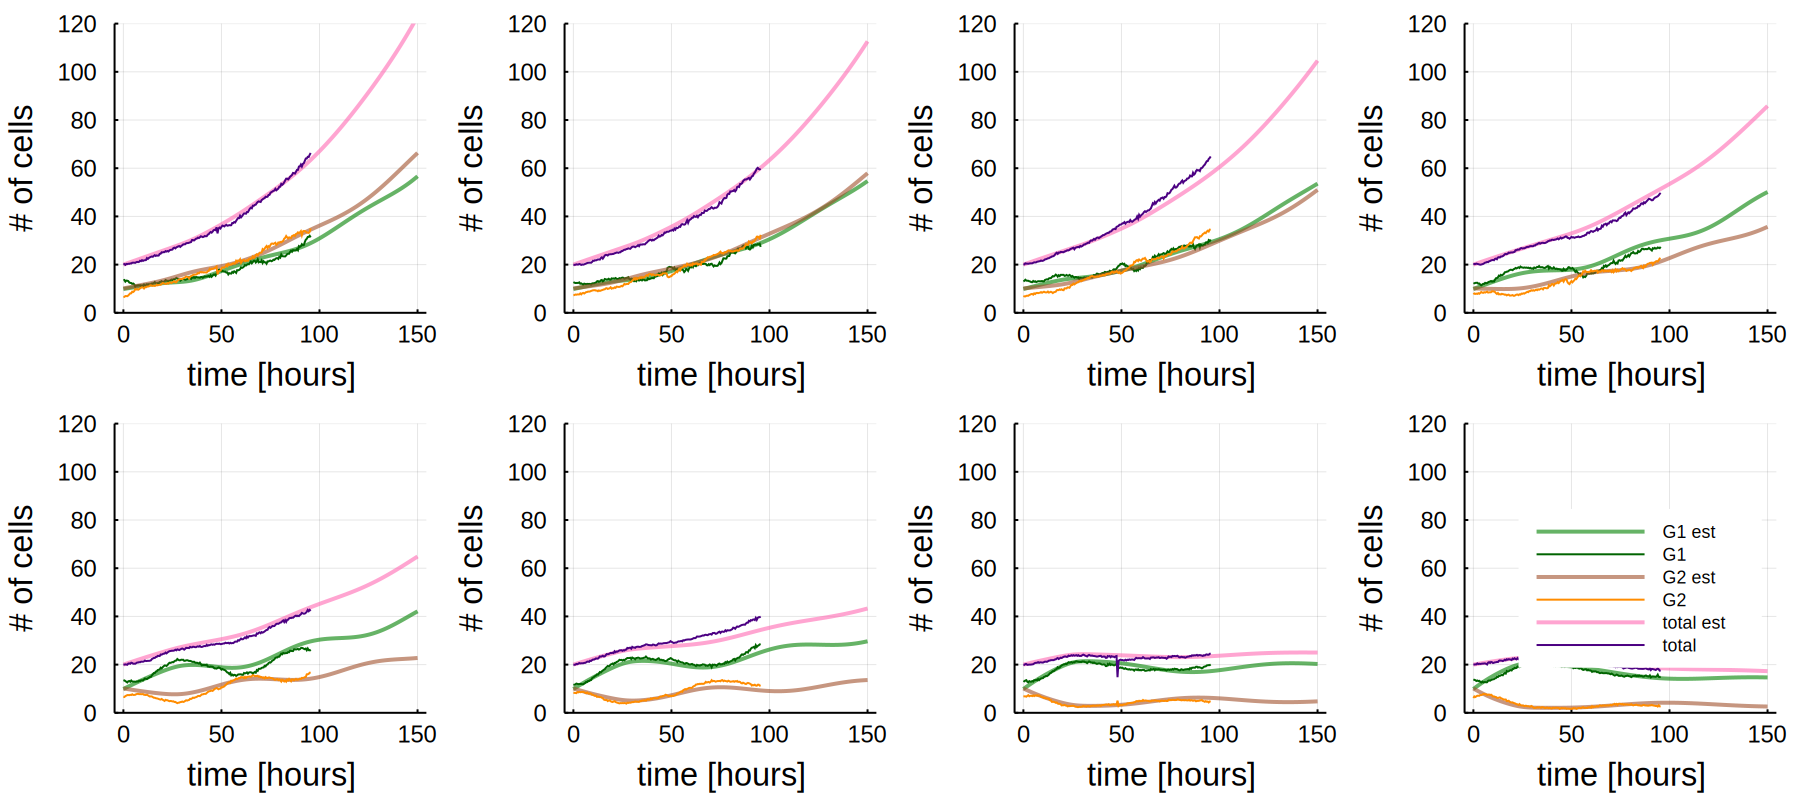

In [4]:
ODEplot_all(effects, g1, g2, g1_0, g2_0, pop, nG1, nG2)